# Lab 4: Solving ODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib notebook
#if you choose an h that is too large, your euler may blow up

In [2]:
def dxdt(t, x, y):
    return t * y


def dydt(t, x, y):
    return x - y**2


# Set initial conditions
t0 = 2
x0 = -2
y0 = 9

# Set the time step size
h = 0.1

# Compute the number of time steps
N = int((6 - t0) / h)

# Initialize arrays to store the values of t, x, and y
t = np.zeros(N + 1)
x = np.zeros(N + 1)
y = np.zeros(N + 1)

# Set the initial values
t[0] = t0
x[0] = x0
y[0] = y0

# Use Euler's method to compute the values of x and y at each time step
for i in range(N):
    t[i + 1] = t[i] + h
    x[i + 1] = x[i] + h * dxdt(t[i], x[i], y[i])
    y[i + 1] = y[i] + h * dydt(t[i], x[i], y[i])

# Print the final values of x and y
print(f"x(6) = {x[-1]}")
print(f"y(6) = {y[-1]}")


x(6) = 44.84029205904187
y(6) = 6.47652763503872


## Exercise 1

### Part 1

Write a function for Euler methods.

In [3]:
# def euler(f, t0, t, y0, n):
#     h = (t-t0)/(n-1)
#     t = np.arange(t0, t+h, h)
#     y = np.zeros(len(t))
#     y[0] = y0
#     for i in range(1, len(t)):
#         y[i] = y[i-1] + f(t[i-1], y[i-1])*h
#     return t, y


def euler(f, t0, t, y0, n):
    h = (t-t0)/(n-1)
    t = np.arange(t0, t+h, h)
    y = np.zeros_like(t)
    y[0] = y0
    for i in range(1, n):
        y[i] = y[i-1] + h*f(t[i-1], y[i-1])
    return t, y





### Part 2

Write a test for your Euler function

In [6]:
def f(t, y):
    return t*y
t, x = euler(f, 2, 6, -2, 101)



In [13]:
x[-1]

-4812236.571355533

In [8]:
def func_y(t, y):
    return euler(f,  2, t, -2, 101)[-1] - euler(func_y,  2, t, 9, 101)[-1]**2


In [9]:
y = func_y(6,2)

C:\Users\malek\AppData\Local\Temp\ipykernel_24768\97511948.py:13: RuntimeWarning: invalid value encountered in scalar divide
  t = np.arange(t0, t+h, h)


ValueError: arange: cannot compute length

In [10]:
def f_exact(t):
    return t**2/2
plt.plot(t, y, color = "blue")
plt.plot(t, f_exact(t), color = "orange")#should be equal at t0 and exact and approx should get further and further apart as t increases

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (101,) and (41,)

In [32]:
#Test function 1: 
def f(t, y):
    return (6*t)*np.exp(2*t) + (2*(3*t**2))*np.exp(2*t)

t, y = euler(f, 0, 10, 0, 101)
#t,y

Text(0, 0.5, 'Y Axis')

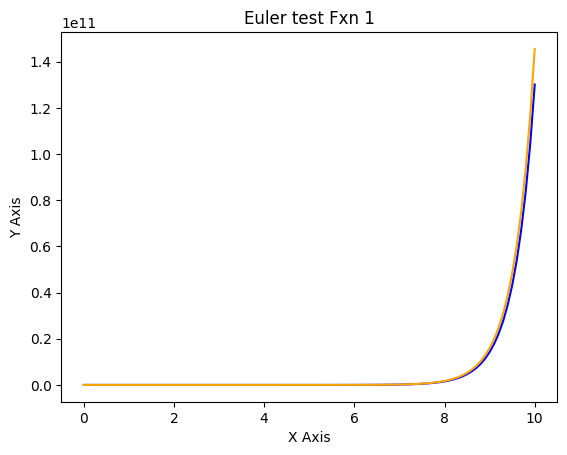

In [33]:
def f_exact(t):
    return (3*t**2)*np.exp(2*t)
plt.plot(t, y, color = "blue")
plt.plot(t, f_exact(t), color = "orange")
plt.title("Euler test Fxn 1")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

Text(0, 0.5, 'Error')

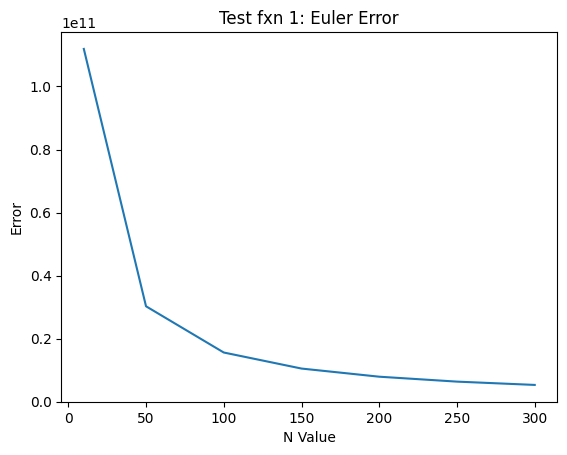

In [34]:
g = [10, 50, 100, 150, 200, 250, 300]#choosing n values
er = []
for i in g:
    er.append(np.abs(euler(f, 0, 10, 0, i)[1][-1]-f_exact(10)))
#plt.figure()
plt.plot(g, er)
plt.title("Test fxn 1: Euler Error")
plt.xlabel("N Value")
plt.ylabel("Error")

In [35]:
#TEST FUNCTION 2:

def f(t, y):
    return 9*y

t,y = euler(f, 0, 3, 4, 101)
#t, y

Text(0, 0.5, 'Y Axis')

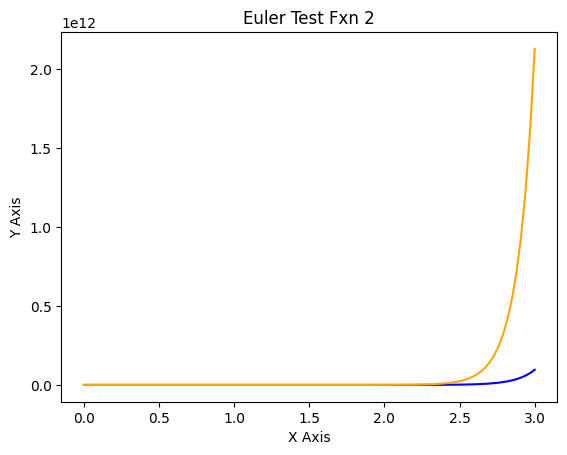

In [36]:
def f_exact(t):
    return 4*np.exp(9*t)

plt.plot(t, y, color = "blue")
plt.plot(t, f_exact(t), color = "orange")
plt.title("Euler Test Fxn 2")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

Text(0, 0.5, 'Error')

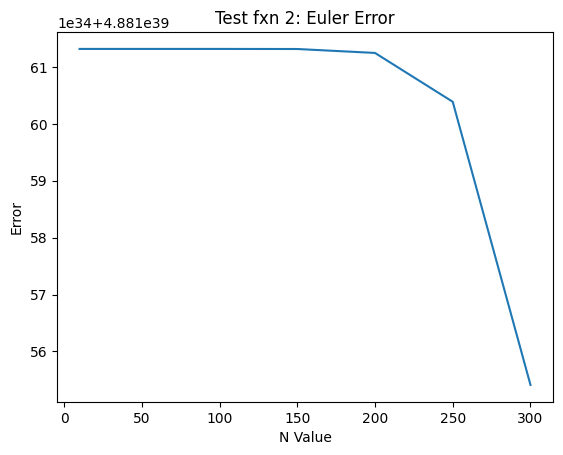

In [37]:
g = [10, 50, 100, 150, 200, 250, 300]#choosing n values
er = []
for i in g:
    er.append(np.abs(euler(f, 0, 10, 4, i)[1][-1]-f_exact(10)))
#plt.figure()
plt.plot(g, er)
plt.title("Test fxn 2: Euler Error")
plt.xlabel("N Value")
plt.ylabel("Error")

## Exercise 2

### Part 1

Write a function for Runge Kutta 4 methods.

In [10]:
def new_method(f, t0, y0, T, n):
    h = (T-t0)/n
    t = np.linspace(t0, T, n+1)
    y_tilde = np.zeros(n+1)
    y = np.zeros_like(y_tilde)
    y[0] = y0
    t[0] = t0
    for i in range(n):
        y_tilde[i+1] = y[i]+h*f(t[i], y[i])
        y[i+1] = y[i] + h/2*(f(t[i], y[i]+f(t[i+1], y_tilde[i+1])))
    return t, y


Text(0, 0.5, 'Error')

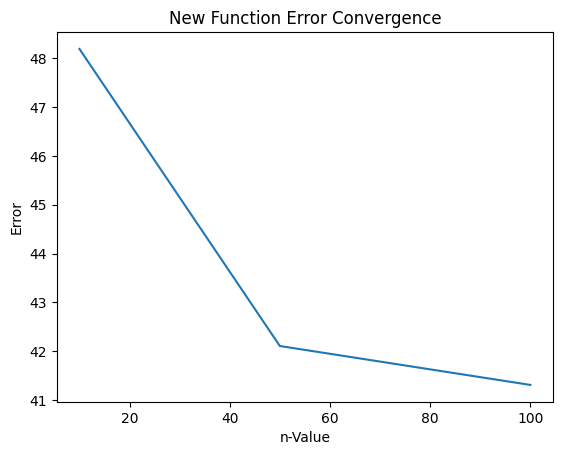

In [6]:
def f(t, y):
    return 4*t**3


def y_exact(t):
    return (t**4)  # initial condition y0 = 0


n_list = np.array([10, 50, 100])
er = np.zeros_like(n_list, dtype='float64')
for i, n in enumerate(n_list):
    er[i] = np.abs(new_method(f, 0, 0, 3, n)[1][-1] - y_exact(3))
plt.plot(n_list, er)
plt.title("New Function Error Convergence")
plt.xlabel("n-Value")
plt.ylabel("Error")


In [7]:
def rk4(f, t0, y0, T, n):
    h = (T - t0) / n
    t = np.linspace(t0, T, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0
    for i in range(n):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(t[i + 1], y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return t, y


Text(0, 0.5, 'Y Axis')

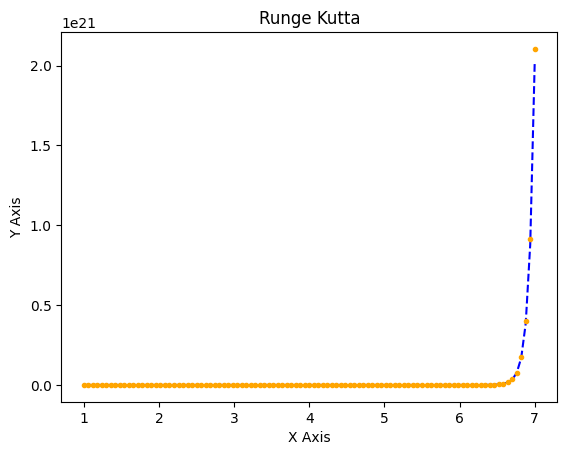

In [127]:
def f(t, y):
    return 2*t*y
t, y = rk(f, 1, 3, 7, 100)


def f_exact(t):
    return 3 * np.exp(-1 + t**2)


plt.plot(t, y,'--' ,color="blue")
plt.plot(t, f_exact(t), '.',color="orange")
plt.title("Runge Kutta")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")


### Part 2

Write a test for your Runge Kutta 4 function

In [35]:
#Test Function 1: 
def f(t, y):
    return (2*y)/(2*t**2-1)


t, y = rk4(f, 1, -np.exp(-1),5, 400)
#t, y #NEED TO CHOOSE A FUNCTION OF AT LEAST DEGREE 5 BECAUSE DEGREE 4 IS EXACT. do one with error 4 and make sure error is 0

In [36]:
t

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.

In [37]:
y[-1]

-1.046133426794028

Text(0, 0.5, 'Y Axis')

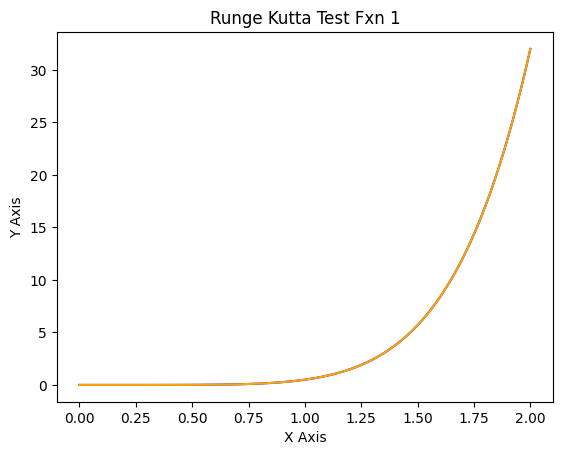

In [138]:
def f_exact(t):
    return (t**6)/2
plt.plot(t, y, color = "blue")
plt.plot(t, f_exact(t), color = "orange")
plt.title("Runge Kutta Test Fxn 1")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

Text(0, 0.5, 'Error')

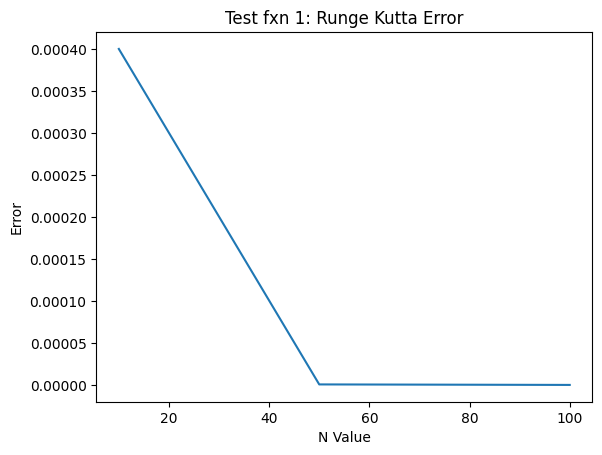

In [157]:
g = np.array([10,50,100])
er = np.zeros_like(g, dtype='float64')
for i, n in enumerate(g):
    er[i] = np.abs(rk(f, 0, 0, 2, n)[1][-1] - f_exact(2))
plt.plot(g, er)
plt.title("Test fxn 1: Runge Kutta Error")
plt.xlabel("N Value")
plt.ylabel("Error")

In [38]:
er.dtype

dtype('float64')

0.0009765625

In [42]:
#Test Function 2:

def f(t, y):
    return 9*y

t,y = rk(f, 0, 4, 3, 101)
#t, y

Text(0, 0.5, 'Y Axis')

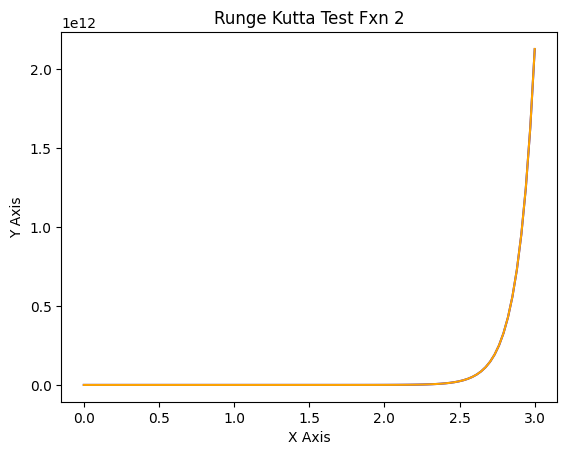

In [43]:
def f_exact(t):
    return 4*np.exp(9*t)

plt.plot(t, y, color = "blue")
plt.plot(t, f_exact(t), color = "orange")
plt.title("Runge Kutta Test Fxn 2")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

Text(0, 0.5, 'Error')

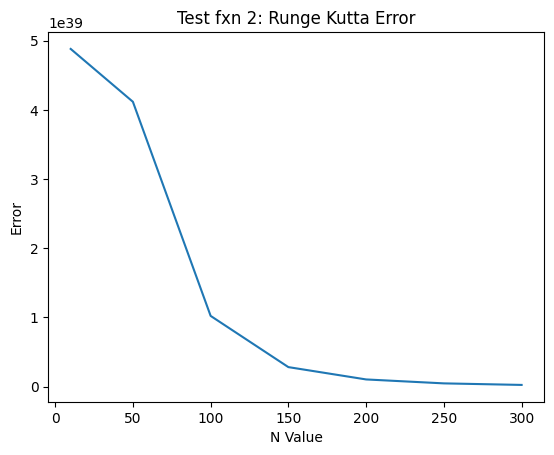

In [44]:
g = [10, 50, 100, 150, 200, 250, 300]#choosing n values
er = []
for i in g:
    er.append(np.abs(rk(f, 0, 4, 10, i)[1][-1]-f_exact(10)))
#plt.figure()
plt.plot(g, er)
plt.title("Test fxn 2: Runge Kutta Error")
plt.xlabel("N Value")
plt.ylabel("Error")

## Exercise 3

Use Euler/RK4's method to approximate/plot the solutions for each of the following initial-value problems. (Plot your solution for all the values of t)
1. $y'=2e^{-ty}$, $0\leq t \leq 2$, $y(0)=1/2$, with $h=0.01$
2. $y'=\frac{1+2t}{1+3y}$, $2\leq t \leq 5$, $y(2)=3$, with $h=0.02$
3. $y' = t^{2}\cos(y)$, $0 \leq t \leq \pi$, $y(0) = 2$, with $h=\pi/50$
4. $ y' = \frac{t^3}{y},\; 1 < t < 10, \; y(1) = 1$, with $h=0.001$

Text(0.5, 1.0, 'Number 1: Euler method')

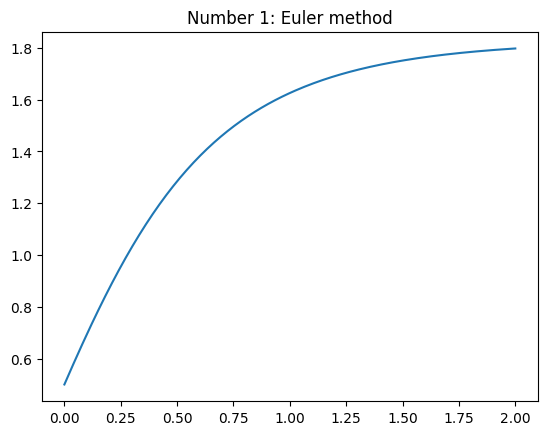

In [88]:
#Problem 1 using euler:
def f(t, y):
    return 2*np.exp(-(t*y))
t, y = euler(f, 0, 2, 0.5, 200)
t, y
plt.plot(t, y)
plt.title("Number 1: Euler method")

Text(0.5, 1.0, 'Number 1: Runge Kutta')

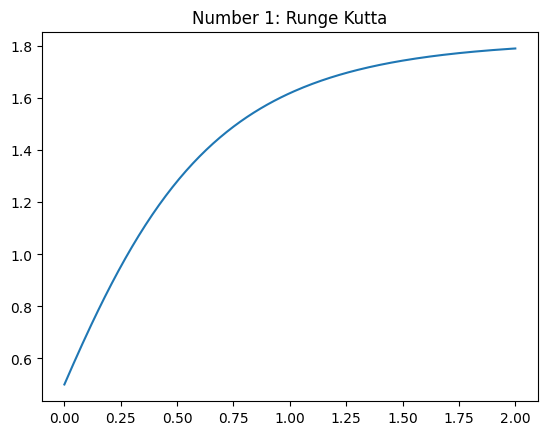

In [89]:
#Problem 1 using runge kutta:
g, h = rk(f, 0, 0.5, 2, 200)
g, h
plt.plot(g, h)
plt.title("Number 1: Runge Kutta")

Text(0.5, 1.0, 'Number 1: Both Methods')

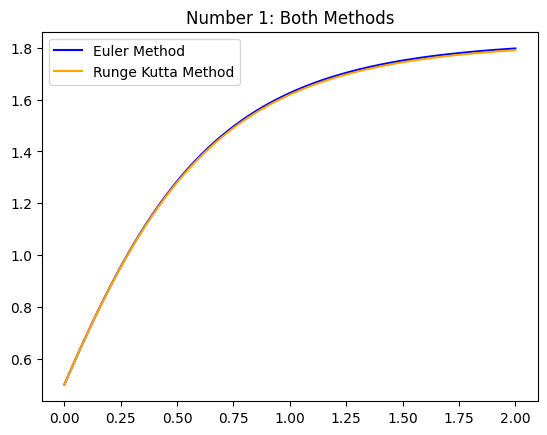

In [90]:
#Number 1 plotted
plt.plot(t, y, color = "blue")
plt.plot(g, h, color = "orange")
plt.legend(['Euler Method', 'Runge Kutta Method'])
plt.title("Number 1: Both Methods")

Text(0.5, 1.0, 'Number 2: Euler Method')

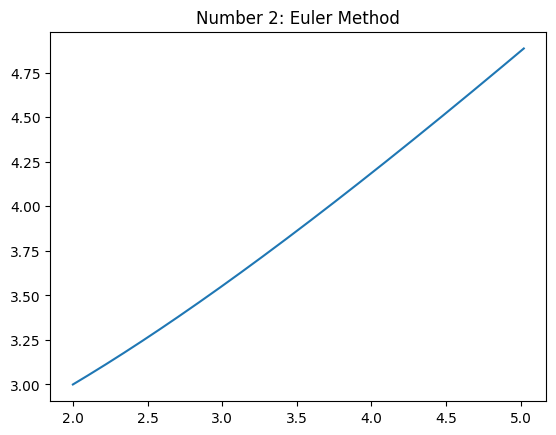

In [91]:
#Problem 2 using euler:
def f(t, y):
    return (1+(2*t))/(1+(3*y))

t, y = euler(f, 2, 5, 3, 150)
plt.plot(t, y)
plt.title("Number 2: Euler Method")

Text(0.5, 1.0, 'Number 2: Runge Kutta Method')

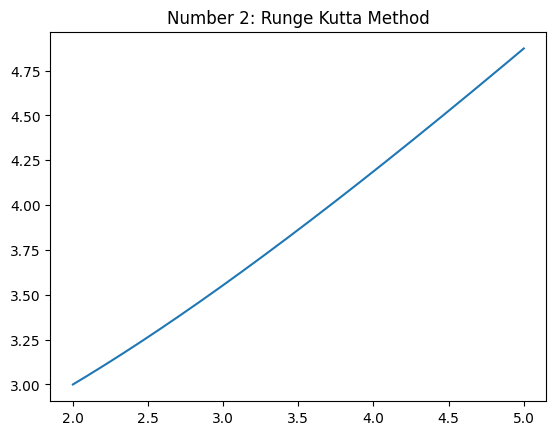

In [94]:
#Problem 2 using runge kutta:
g, h = rk(f, 2, 3, 5, 150)
#g, h
plt.plot(g, h)
plt.title("Number 2: Runge Kutta Method")

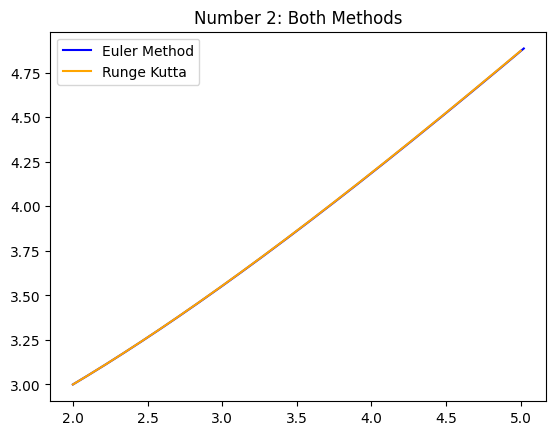

In [95]:
plt.plot(t, y, 'blue', g, h, 'orange')
plt.title("Number 2: Both Methods")
plt.legend(["Euler Method", "Runge Kutta"])


Text(0.5, 1.0, 'Number 3: Euler Method')

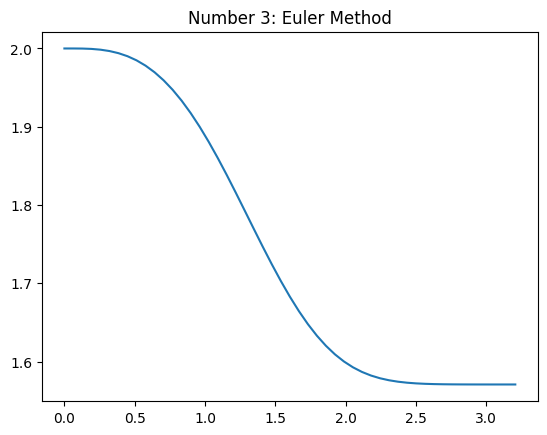

In [96]:
#Problem 3 using euler:
def f(t, y):
    return (t**(2))*(np.cos(y))

t, y = euler(f, 0, np.pi, 2, 50)
#t, y
plt.plot(t, y)
plt.title("Number 3: Euler Method")

Text(0.5, 1.0, 'Number 3: Runge Kutta Method')

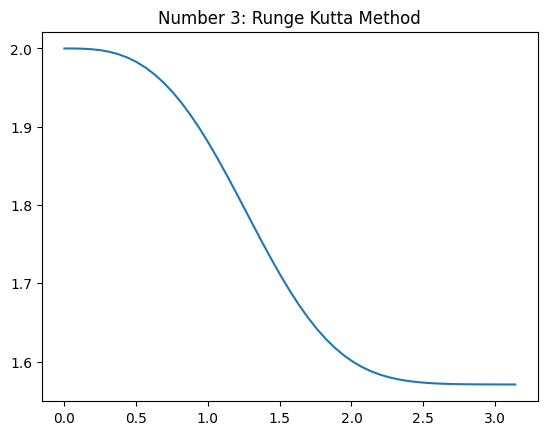

In [97]:
def f(t, y):
    return (t**(2))*(np.cos(y))

g, h = rk(f, 0, 2, np.pi, 50)
#g, h
plt.plot(g, h)
plt.title("Number 3: Runge Kutta Method")

Text(0.5, 1.0, 'Problem 3: Both Methods')

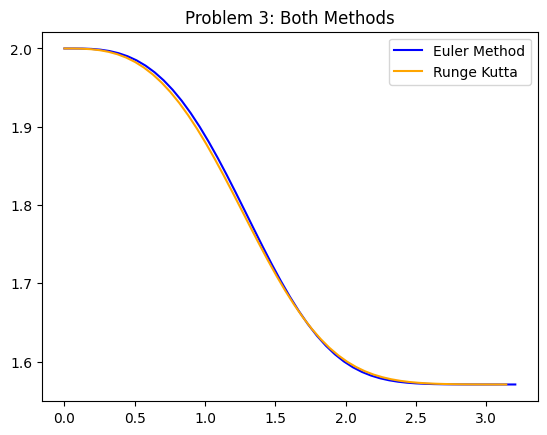

In [98]:
plt.plot(t,y, color = "blue")
plt.plot(g, h, color = "orange")
plt.legend(["Euler Method", "Runge Kutta"])
plt.title("Problem 3: Both Methods")

Text(0.5, 1.0, 'Number 4: Euler Method')

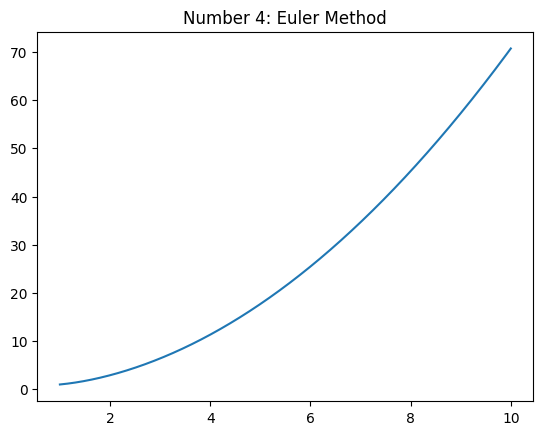

In [54]:
#Problem 4 using euler:
def f(t, y):
    return t**3/y

t, y = euler(f, 1, 10, 1, 9000)
#t, y
plt.plot(t, y)
plt.title("Number 4: Euler Method")

Text(0.5, 1.0, 'Number 4: Runge Kutta Method')

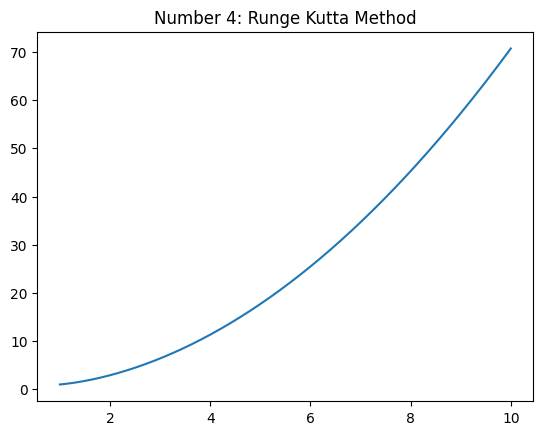

In [55]:
#Problem 4 using runge kutta:
g, h = rk(f, 1,1,10, 9000)
#g, h
plt.plot(g, h)
plt.title("Number 4: Runge Kutta Method")

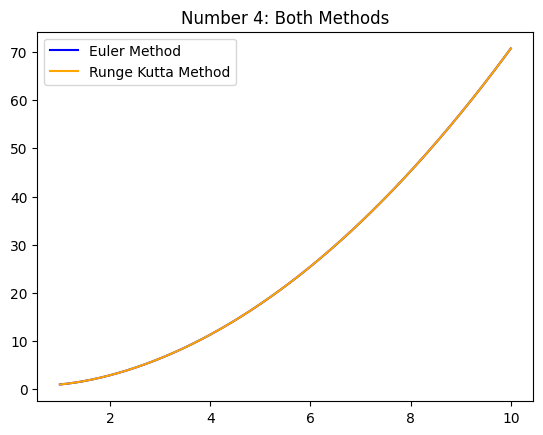

In [56]:
plt.plot(t, y, color = "blue")
plt.plot(g, h, color = "orange")
plt.title("Number 4: Both Methods")
plt.legend(["Euler Method", "Runge Kutta Method"])

## Exercise 4

Use Euler/RK4's method to approximate/plot the solutions for each of the following initial-value problem.
$$ y'= \frac{2-2ty}{t^2+1}, ~~~~ 1\leq t \leq 3, ~~~~ y(1)=2$$
The actual solutions to the initial-value is 
$$y(t)=\frac{2t+2}{t^2+1}.$$
1. Compute/plot the error of your approximation and bound the error for $1\leq t \leq 3$, for $h=0.01, 0.005, 0.001$
2. Approximate $y(3)$ for for $h=0.01, 0.005, 0.001$ and compute the error.

In [57]:
def f(t, y):
    return (2 - 2*t*y)/(t**2 + 1)

t, y = euler(f, 1, 3, 2, 200)
#t,y

In [58]:
def exact_f(t):
    return (2*t +2)/(t**2 + 1)

Text(0.5, 1.0, 'Euler approximation, h = 0.01')

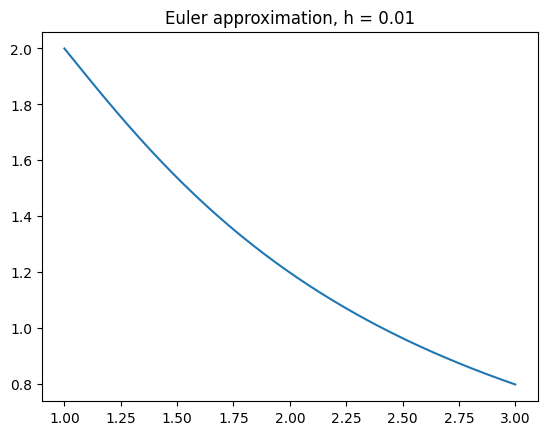

In [59]:
plt.plot(t, y)
plt.title("Euler approximation, h = 0.01")
#plt.plot(t, exact_f(t))

Text(0, 0.5, 'Error')

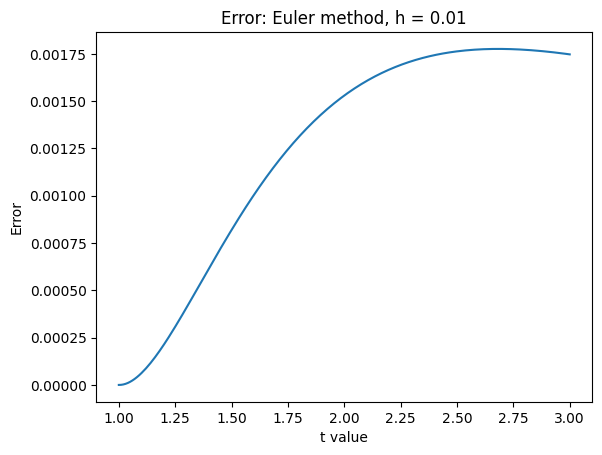

In [60]:
#h = 0.01 euler error:
error = np.abs(exact_f(t) - y)
plt.plot(t, error)
plt.title("Error: Euler method, h = 0.01")
plt.xlabel("t value")
plt.ylabel("Error")

In [61]:
#approximation of y(3) using euler method:
real = exact_f(3)
real
print("Based on the Euler Method, y(3) is approximately",y[-1], "using h = 0.01")
print("This is", np.abs(real - y[-1]), "away from the real value.")

Based on the Euler Method, y(3) is approximately 0.7982525805562367 using h = 0.01
This is 0.0017474194437633317 away from the real value.


In [62]:
def f(t, y):
    return (2 - 2*t*y)/(t**2 + 1)
t, y = rk(f, 1,2,3,200)

Text(0.5, 1.0, 'Runge Kutta approximation, h = 0.01')

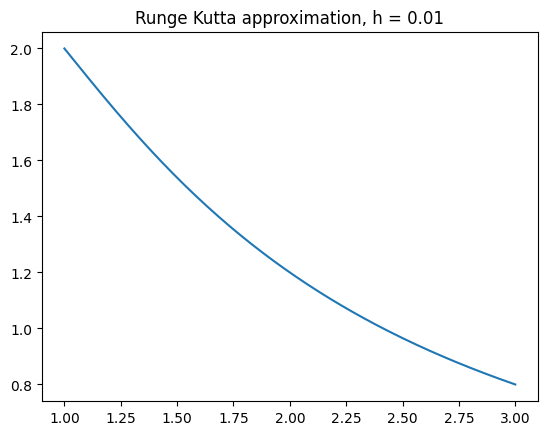

In [63]:
plt.plot(t, y)
plt.title("Runge Kutta approximation, h = 0.01")
#plt.plot(t, exact_f(t))

In [64]:
#ERROR:
#error = np.abs(y(t) - y)#y is the exact function with all the t's plugged in, then take the euler y's (and the RK y's) and plot.
#plt.plot(t, error)
#error should be 0 at the starting point and then get bigger and bigger

Text(0, 0.5, 'Error')

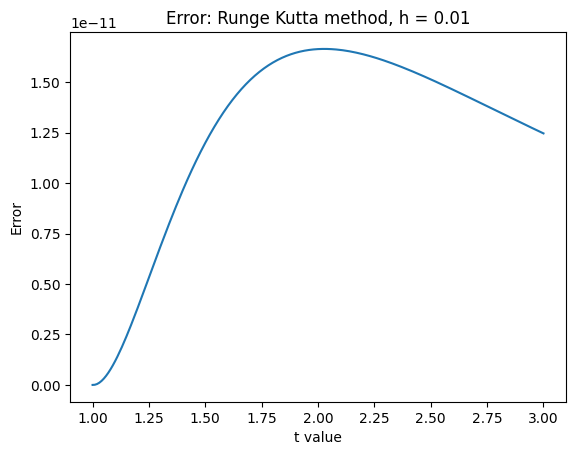

In [65]:
#error: runge kutta, h = 0.01
error = np.abs(exact_f(t) - y)
plt.plot(t, error)
plt.title("Error: Runge Kutta method, h = 0.01")
plt.xlabel("t value")
plt.ylabel("Error")

In [66]:
#approximation of y(3) using runge kutta method:
real = exact_f(3)
real
print("Based on the Runge Kutta Method, y(3) is approximately",y[-1], "using h = 0.01")
print("This is", np.abs(real - y[-1]), "away from the real value.")

Based on the Runge Kutta Method, y(3) is approximately 0.800000000012465 using h = 0.01
This is 1.2464917986676483e-11 away from the real value.


Text(0.5, 1.0, 'Euler approximation, h = 0.005')

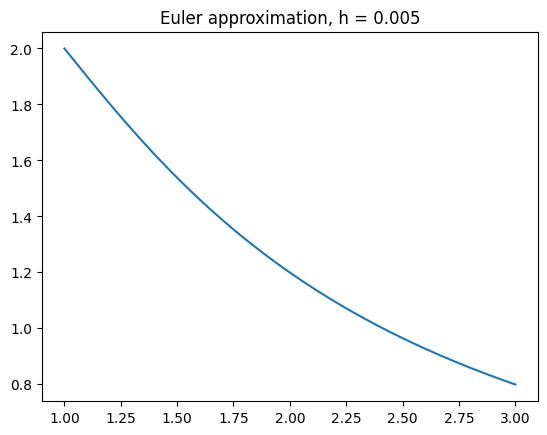

In [67]:
t, y  = euler(f, 1, 3, 2, 400)
plt.plot(t, y)
plt.title("Euler approximation, h = 0.005")

Text(0, 0.5, 'Error')

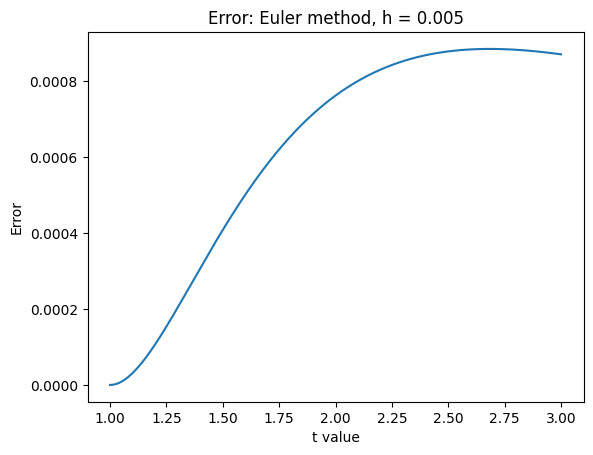

In [68]:
error = np.abs(exact_f(t) - y)
plt.plot(t, error)
plt.title("Error: Euler method, h = 0.005")
plt.xlabel("t value")
plt.ylabel("Error")

In [69]:
#approximation of y(3) using euler method:
real = exact_f(3)
real
print("Based on the Euler Method, y(3) is approximately",y[-1], "using h = 0.005")
print("This is", np.abs(real - y[-1]), "away from the real value.")

Based on the Euler Method, y(3) is approximately 0.7991289705685197 using h = 0.005
This is 0.0008710294314803191 away from the real value.


Text(0.5, 1.0, 'Runge Kutta approximation, h = 0.005')

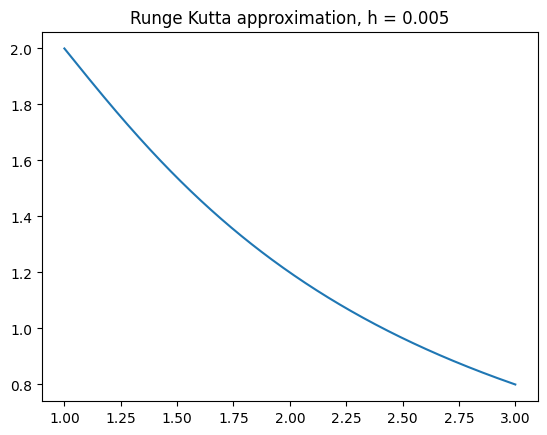

In [70]:
t, y = rk(f, 1, 2, 3, 400)
plt.plot(t, y)
plt.title("Runge Kutta approximation, h = 0.005")

Text(0, 0.5, 'Error')

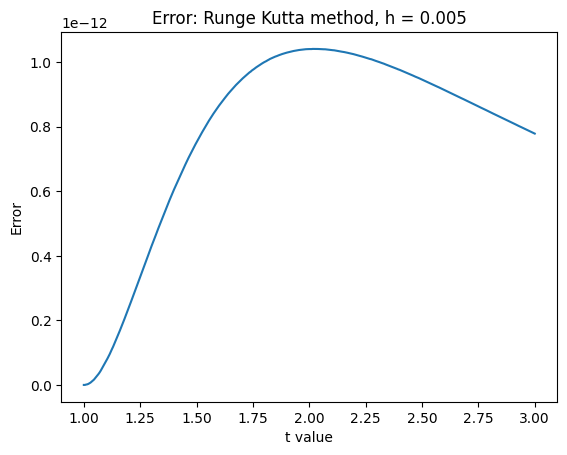

In [71]:
error = np.abs(exact_f(t) - y)
plt.plot(t, error)
plt.title("Error: Runge Kutta method, h = 0.005")
plt.xlabel("t value")
plt.ylabel("Error")

In [72]:
#approximation of y(3) using euler method:
real = exact_f(3)
real
print("Based on the Runge Kutta Method, y(3) is approximately",y[-1], "using h = 0.005")
print("This is", np.abs(real - y[-1]), "away from the real value.")

Based on the Runge Kutta Method, y(3) is approximately 0.8000000000007786 using h = 0.005
This is 7.785994071696223e-13 away from the real value.


Text(0.5, 1.0, 'Euler approximation, h = 0.001')

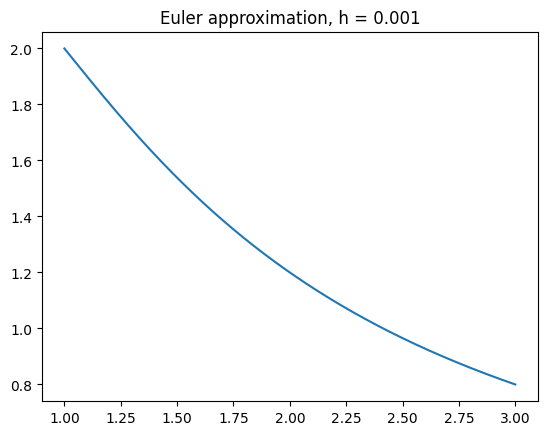

In [73]:
t, y = euler(f, 1,3,2, 2000)
plt.plot(t, y)
plt.title("Euler approximation, h = 0.001")

Text(0, 0.5, 'Error')

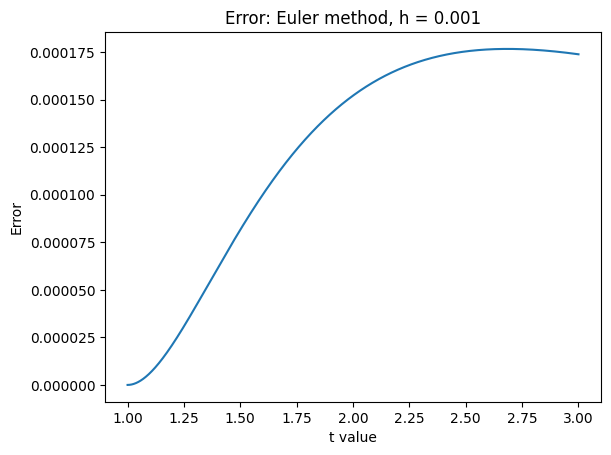

In [74]:
error = np.abs(exact_f(t) - y)
plt.plot(t, error)
plt.title("Error: Euler method, h = 0.001")
plt.xlabel("t value")
plt.ylabel("Error")

In [75]:
#approximation of y(3) using euler method:
real = exact_f(3)
real
print("Based on the Euler Method, y(3) is approximately",y[-1], "using h = 0.001")
print("This is", np.abs(real - y[-1]), "away from the real value.")

Based on the Euler Method, y(3) is approximately 0.7998262204493483 using h = 0.001
This is 0.00017377955065178696 away from the real value.


Text(0.5, 1.0, 'Runge Kutta approximation, h = 0.001')

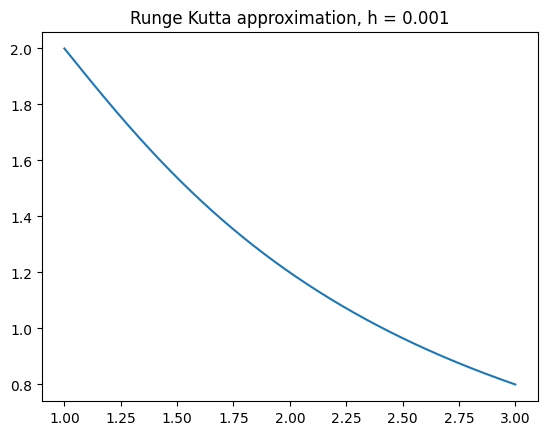

In [76]:
t, y = rk(f, 1,2,3, 2000)
plt.plot(t, y)
plt.title("Runge Kutta approximation, h = 0.001")

Text(0, 0.5, 'Error')

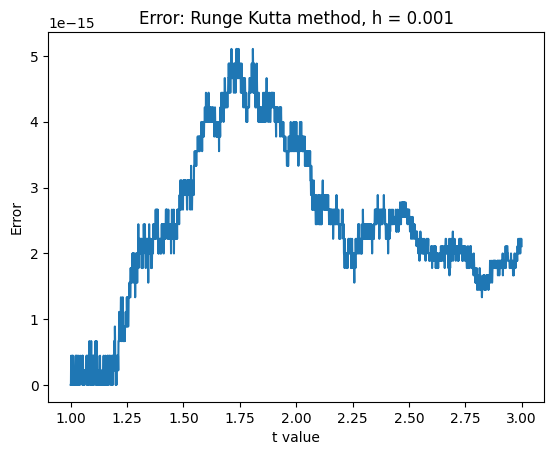

In [77]:
error = np.abs(exact_f(t) - y)
plt.plot(t, error)
plt.title("Error: Runge Kutta method, h = 0.001")
plt.xlabel("t value")
plt.ylabel("Error")

In [78]:
#approximation of y(3) using euler method:
real = exact_f(3)
real
print("Based on the Runge Kutta Method, y(3) is approximately",y[-1], "using h = 0.001")
print("This is", np.abs(real - y[-1]), "away from the real value.")

Based on the Runge Kutta Method, y(3) is approximately 0.8000000000000022 using h = 0.001
This is 2.1094237467877974e-15 away from the real value.


## Exercise 5

Given the initial-value problem 
$$y'=te^{-t}-y,\; 0\leq t \leq 10, \; y(0)=1$$
Approximate y(10) using Euler/RK4's method with h = 0.1, h =0.01, and h = 0.001. 

In [233]:
def f(t, y):
    return t*np.exp(-t) - y

t, y = euler(f, 0, 10, 1, 100) #euler and h=0.1
t1, y1 = euler(f, 0, 10, 1, 1000) #euler and h = 0.01
t2, y2 = euler(f, 0, 10, 1, 10000)
g, h = rk(f, 0, 1, 10, 100) #rk and h = 0.1
g1, h1 = rk(f, 0, 1, 10, 1000) #rk and h = 0.01
g2, h2 = rk(f, 0, 1, 10, 10000) #rk and h = 0.001
#then just use the index to find y(10)

In [238]:
#approximations of y(10):
print("Euler method with h = 0.1 produces a y(10) approximation of", y[-1])
print("Euler method with h = 0.01 produces a y(10) approximation of", y1[-1])
print("Euler method with h = 0.001 produces a y(10) approximation of", y2[-1])
print("Runge Kutta method with h = 0.1 produces a y(10) approximation of", h[-1])
print("Runge Kutta method with h = 0.01 produces a y(10) approximation of", h1[-1])
print("Runge Kutta method with h = 0.001 produces a y(10) approximation of", h2[-1])

Euler method with h = 0.1 produces a y(10) approximation of 0.0021255650619698896
Euler method with h = 0.01 produces a y(10) approximation of 0.0022957917624855362
Euler method with h = 0.001 produces a y(10) approximation of 0.0023134297736837547
Runge Kutta method with h = 0.1 produces a y(10) approximation of 0.0023154001289511917
Runge Kutta method with h = 0.01 produces a y(10) approximation of 0.002315396418234657
Runge Kutta method with h = 0.001 produces a y(10) approximation of 0.0023153964178861063


### Exercise 6

Test the [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)

In [111]:
def f(t, y):
    return 3*y

#sp.integrate.solve_ivp(function, (t0, T), y0, t_eval) and y0 is an array.
#for y0, the n is the number of equations so here, n = 1
#t_eval is optional. whenever you use an optional argument you need to say the name (t_eval) and then put it equal to the t you defined

t = np.linspace(0, 10, 11) #if t0 is 0 and T is 10

res = spi.solve_ivp(f, (0, 10), [5], t_eval = t)
res.t #not res[0] because res is an object so do .t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [112]:
res

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00  2.000e+00  3.000e+00  4.000e+00
             5.000e+00  6.000e+00  7.000e+00  8.000e+00  9.000e+00
             1.000e+01]
        y: [[ 5.000e+00  1.004e+02  2.015e+03  4.047e+04  8.130e+05
              1.633e+07  3.280e+08  6.586e+09  1.322e+11  2.654e+12
              5.332e+13]]
      sol: None
 t_events: None
 y_events: None
     nfev: 140
     njev: 0
      nlu: 0

In [103]:
res.y

array([[5.00000000e+00, 1.40083558e+02, 3.92819817e+03, 1.10036517e+05,
        3.08348302e+06, 8.64643942e+07, 2.42118014e+09, 6.78774973e+10,
        1.90284081e+12, 5.33200877e+13]])

In [104]:
5*np.exp(3*res.t)

array([5.00000000e+00, 1.40158124e+02, 3.92885997e+03, 1.10132329e+05,
       3.08718813e+06, 8.65388998e+07, 2.42582598e+09, 6.79998438e+10,
       1.90614612e+12, 5.34323729e+13])

Text(0.5, 1.0, 'Test Function')

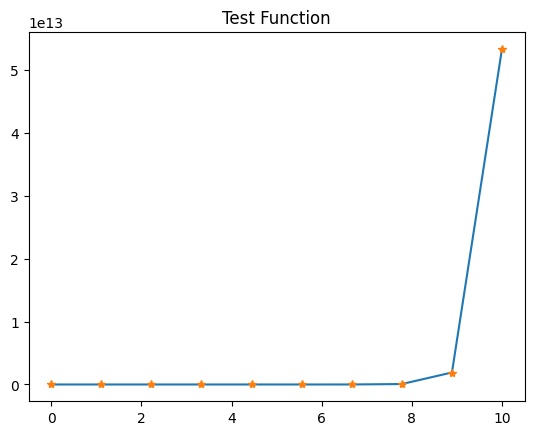

In [105]:
plt.plot(res.t, 5*np.exp(3*res.t))#exact
plt.plot(res.t, res.y[0],'*')#approximation
plt.title("Test Function")

In [14]:
#finding the last y value: the 0 means choose the first array and the -1 means choose the last value in the first array
#y is a double array, hence why you have to choose the array first, then the value.
res.y[0, -1]

53320087671010.09

### Exericse 6

Lokta-Volterra Equations:
$$\begin{cases}
 & \displaystyle{\frac{dx}{dt} = \alpha x - \beta xy } \\
 & \displaystyle{\frac{dy}{dt} = \delta xy - \gamma y}
 \end{cases}$$
 where
* x is the number of prey
* y is the number of some predator
* $\alpha$, $\beta$, $\gamma$, $\delta$ are positive real parameters describing the interaction of the two species.
* The prey are assumed to have an unlimited food supply and to reproduce exponentially, unless subject to predation; this exponential growth is represented in the equation above by the term $\alpha x$. 
* The rate of predation upon the prey is represented above by $\beta xy$. If either x or y is zero, then there can be no predation.
* $\delta xy$ represents the growth of the predator population.
* $\gamma y$ represents the loss rate of the predators due to either natural death or emigration, it leads to an exponential decay in the absence of prey


1. Solve the Lokta-Volterra equations with  the 4 different methods (CHOOSE ONE), with  $\alpha= 1/3$, $\beta = 3/4$, $\gamma = 1 = \delta$
2. Try another cool set of value and solve it. (then choose the values of alpha and beta and gamma and try it again

Text(0.5, 1.0, 'Lokta-Volterra Equations')

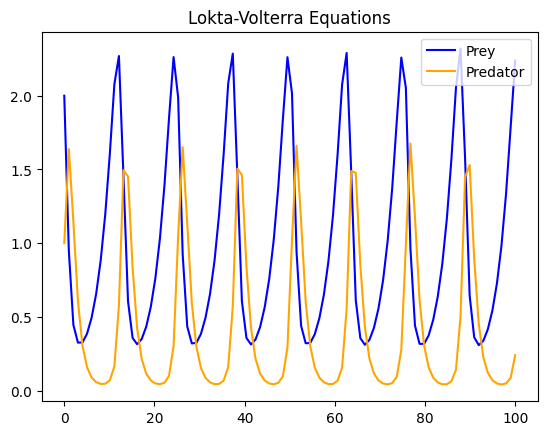

In [8]:
def f(t, y):
    return np.array([1/3*y[0] - 3/4*y[0]*y[1], y[0]*y[1] - y[1]])
t = np.linspace(0, 100, 100)
res = spi.solve_ivp(f, (0,100), [2, 1], t_eval = t)#choose y0  values. dont choose [-1,0] or [10,0] cuz they make no sense
plt.plot(res.t, res.y[0], color = "blue")#prey
plt.plot(res.t, res.y[1], color = "orange")#Predator
plt.legend(["Prey", "Predator"])
plt.title("Lokta-Volterra Equations")

Text(0.5, 1.0, 'Lokta-Volterra Equations')

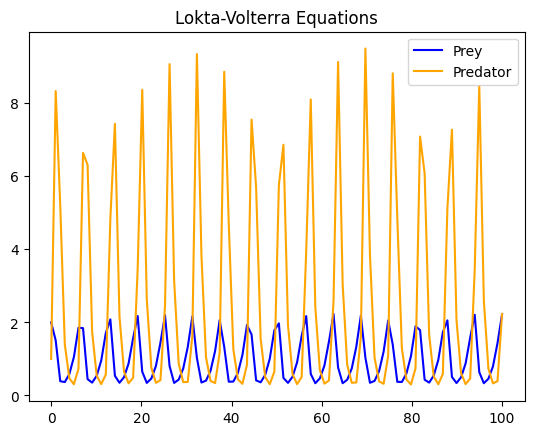

In [9]:
#changes: alpha = 2/3, beta = 1/4, gamma and delta = 2
def f(t, y):
    return np.array([2/3*y[0] - 1/4*y[0]*y[1], 2*y[0]*y[1] - 2*y[1]])

t = np.linspace(0, 100, 100)

res = spi.solve_ivp(f, (0,100), [2, 1], t_eval = t)
plt.plot(res.t, res.y[0], color = "blue")#prey
plt.plot(res.t, res.y[1], color = "orange")#Predator
plt.legend(["Prey", "Predator"])
plt.title("Lokta-Volterra Equations")

## Exercise 7
Solve the pendulum equations
$$\begin{cases}
\frac{d\theta}{dt} &= \omega \\
\frac{d\omega}{dt} &=\frac{b}{m}\omega + \frac{g}{L}\sin(\theta)
\end{cases}$$
with 
* $L$ is the length of the pendulum
* $\theta$ is the angle
* $b$ is the damping coefficient
* $g$ is the gravity


![Alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Faleksandarhaber.com%2Fwp-content%2Fuploads%2F2020%2F03%2Fpendulum1.jpg&f=1&nofb=1&ipt=66ff055ec65998da85ef499095f3b9d6602cec3fe7fb3c6b1550054043ef99ea&ipo=images)


For our case we can pick $L=1$, $b=0.05$, $g=9.81$, $m=1$. Start with $\theta=\pi/2$ and solve the ODE. Try with a different starting $\theta$ and solve the ODE.

Text(0.5, 1.0, 'Pendulum Equations: theta = pi/2')

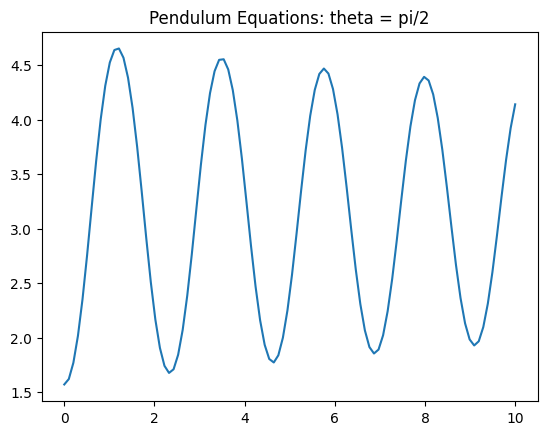

In [10]:
def f(t,y):  
    return np.array([y[1], (-0.05)*y[1] + 9.81*np.sin(y[0])])
#choose y0's. omega = 0 so you just drop it

t = np.linspace(0, 10, 100)
res = spi.solve_ivp(f, (0, 10), [np.pi/2, 0], t_eval = t)
plt.plot(res.t, res.y[0])#only plot theta (y[0])
#plt.plot(res.t, res.y[1])
plt.title("Pendulum Equations: theta = pi/2")

Text(0.5, 1.0, 'Pendulum Equations: theta = pi/3')

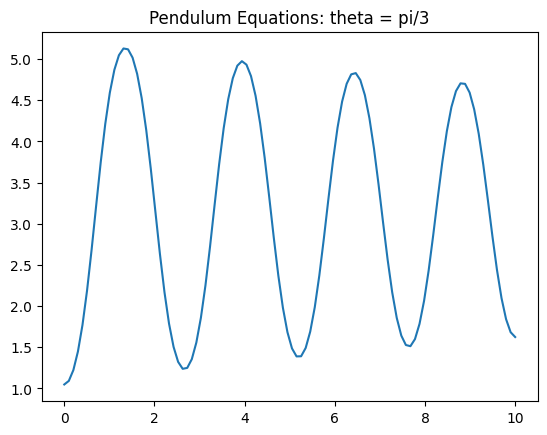

In [11]:
#Changes: theta = pi/3

def f(t,y):  
    return np.array([y[1], (-0.05)*y[1] + 9.81*np.sin(y[0])])
#choose y0's. omega = 0 so you just drop it

t = np.linspace(0, 10, 100)
res = spi.solve_ivp(f, (0, 10), [np.pi/3, 0], t_eval = t)
plt.plot(res.t, res.y[0])#only plot theta (y[0])
#plt.plot(res.t, res.y[1])
plt.title("Pendulum Equations: theta = pi/3")

## Exercise 8

The SIR model. To learn more you can see [Compartemental Model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) or [SIR Modeling - Western Kentucky University
](https://people.wku.edu/lily.popova.zhuhadar/)

* $S(t)$: the number of individuals susceptible of contracting the infection at time $t$,
* $I(t)$: the number of individuals that are alive and infected at time t;
* $R(t)$: the cumulative number of individuals that recovered from the disease up to time t;

In addition, $N$ is the total number of people in the area at time $t$ with $N = S(t) + I(t) + R(t)$.
The SIRD model is given by the following expressions:
\begin{equation} 
\begin{split}
\dfrac{dS}{dt} &=  -\frac{\beta I S}{N}, \\ 
\dfrac{dI}{dt} &=  \frac{\beta I S}{N} - \gamma I\\
\dfrac{dR}{dt} &= \gamma I,\\
\end{split}
\end{equation}

### Part I
Pick $\beta=0.2$, $\gamma=1/10$, $N=1000$, $I(0)=1$, solve this epidemic problem. What is the percentage of Recovered/Immuned indivual needed for the desease to stop spreading?

80% of individuals must be recovered/immune for the disease to stop spreading


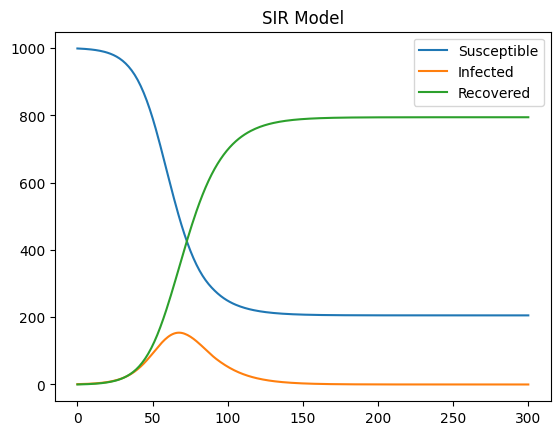

In [12]:
#choose for y0: [999, 1, 0] because if you start with 1 infected person, 0 are immune and the rest (N-1) are susceptible
def f(t, y):
    return np.array([(-0.2*y[1]*y[0])/1000, ((0.2*y[1]*y[0])/1000) - (y[1])/10, (y[1])/10])

t = np.linspace(0, 300, 300)
res = spi.solve_ivp(f, (0, 300), [999, 1, 0], t_eval = t)
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])
plt.plot(res.t, res.y[2])
plt.legend(["Susceptible", "Infected", "Recovered"])
plt.title("SIR Model")
print("80% of individuals must be recovered/immune for the disease to stop spreading")
#80% for no spread

### Part II

Find and model the spread of specific desease/infection using the SIR model.

Text(0.5, 1.0, 'SIR Model: Ebola')

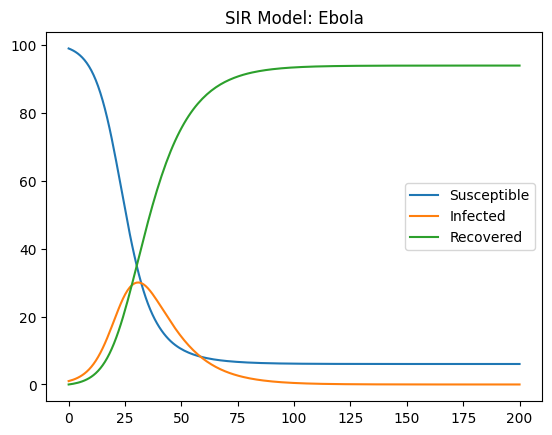

In [13]:
#Modeling Ebola: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://iopscience.iop.org/article/10.1088/1742-6596/855/1/012008/pdf
# beta = 0.2605, gamma = 1/11.4 days, N = 100 people
def f(t, y):
    return np.array([(-0.2605*y[1]*y[0])/100, ((0.2605*y[1]*y[0])/100) - (y[1])/11.4, (y[1])/11.4])

t = np.linspace(0, 200, 200)
res = spi.solve_ivp(f, (0, 200), [99, 1, 0], t_eval = t)
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])
plt.plot(res.t, res.y[2])
plt.legend(["Susceptible", "Infected", "Recovered"])
plt.title("SIR Model: Ebola")

## BONUS: Exercise 9
Use the Euler Implicit method to approximate/plot the solutions to each of the following initial-value. See [Euler Implicite](https://en.wikipedia.org/wiki/Backward_Euler_method).
1. $y' = -ty + 4t/y$, $0 \leq t \leq 1$, $y(0) = 1$, with $h = 0.1$
2. $y' = \frac{y^2+y}{t}$, $1 \leq  t  \leq 3$, $y(l) = -2$, with $h = 0.2$ 